## Decision Tree Regressor
Goal: Predict income from phone case colour and age

In [9]:
import pandas as pd
import numpy

In [10]:
phonecases = pd.read_csv('../../../data/phonecase.csv')

In [11]:
set(phonecases.Colour)

{'Pink', 'Red', 'Yellow'}

In [12]:
for colour in set(phonecases.Colour):
    phonecases[colour] = numpy.where(phonecases.Colour == colour,1,0)

In [13]:
phonecases

,Age,Income,Colour,Pink,Yellow,Red
0,12,0,Red,0,0,1
1,14,10,Red,0,0,1
2,15,0,Red,0,0,1
3,17,500,Yellow,0,1,0
4,18,10000,Red,0,0,1
5,19,30000,Yellow,0,1,0
6,21,0,Yellow,0,1,0
7,21,20000,Yellow,0,1,0
8,23,30000,Yellow,0,1,0
9,25,40000,Pink,1,0,0


In [14]:
X = phonecases[['Red', 'Pink', 'Yellow', 'Age']]

In [15]:
y = phonecases.Income

In [16]:
import sklearn.tree

In [23]:
regressor = sklearn.tree.DecisionTreeRegressor(max_depth=3)

In [24]:
regressor.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [25]:
#funky python function zip puts two arrays together
zip(regressor.predict(X), y)

[(127.5, 0),
 (127.5, 10),
 (127.5, 0),
 (127.5, 500),
 (15000.0, 10000),
 (15000.0, 30000),
 (15000.0, 0),
 (15000.0, 20000),
 (30000.0, 30000),
 (40000.0, 40000),
 (100000.0, 100000),
 (80000.0, 80000),
 (150000.0, 150000),
 (80000.0, 60000),
 (80000.0, 100000),
 (43333.333333333336, 40000),
 (43333.333333333336, 60000),
 (43333.333333333336, 30000)]

In [27]:
import StringIO
s = StringIO.StringIO()
sklearn.tree.export_graphviz(regressor, out_file = s, feature_names=['Red', 'Pink', 'Yellow', 'Age'])

In [28]:
import pydotplus
graph = pydotplus.graph_from_dot_data(s.getvalue())

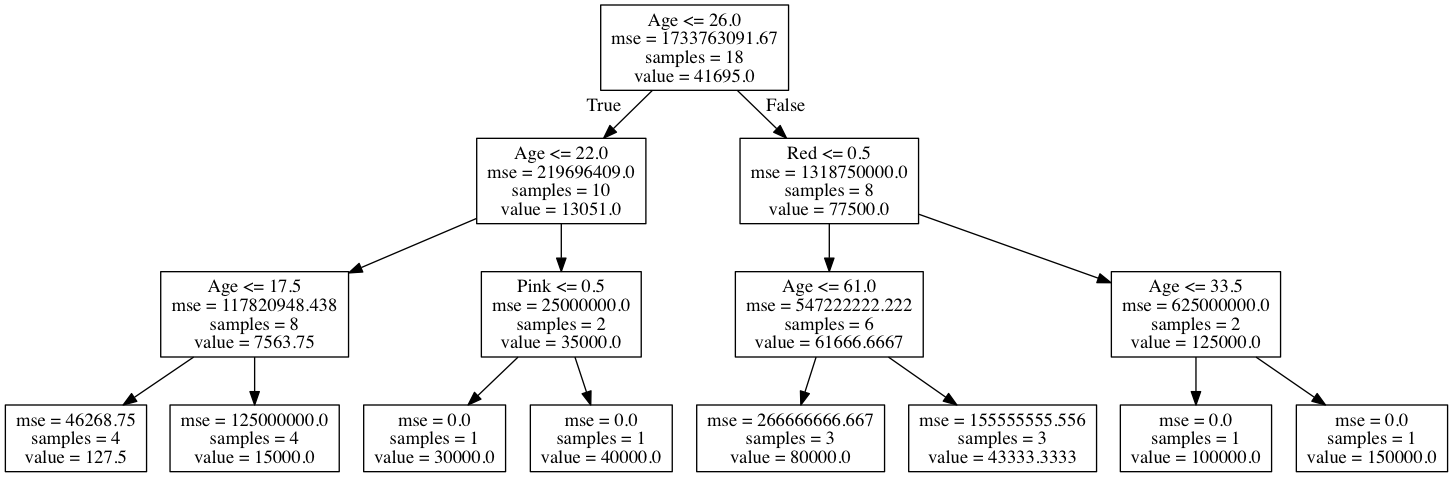

In [31]:
import IPython.display
IPython.display.Image(graph.create_png())

In [32]:
import sklearn.grid_search

In [39]:
dtr = sklearn.tree.DecisionTreeRegressor()
brute_force = sklearn.grid_search.GridSearchCV(dtr, {'max_depth': range(1,10)}, cv=6, scoring='mean_squared_error')

In [40]:
brute_force.fit(X, y)

GridSearchCV(cv=6, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [46]:
brute_force.best_params_

{'max_depth': 2}

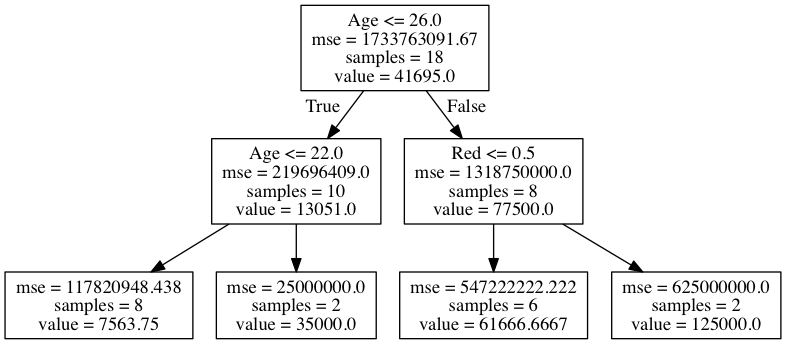

In [42]:
s = StringIO.StringIO()
sklearn.tree.export_graphviz(brute_force.best_estimator_, out_file = s, feature_names=['Red', 'Pink', 'Yellow', 'Age'])
graph = pydotplus.graph_from_dot_data(s.getvalue())
IPython.display.Image(graph.create_png())